In [23]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random

### MNIST 데이터 다운

In [85]:
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [107]:
LEARNING_RATE = 0.1
image_size = 784 #28*28
nb_classes = 10 #0~9

### placeholder

In [108]:
X= tf.placeholder(tf.float32, shape=[None, image_size])
Y = tf.placeholder(tf.float32, shape=[None, nb_classes])

W= tf.Variable(tf.random_normal([image_size,nb_classes],name="weight"))
b=tf.Variable(tf.random_normal([nb_classes],name='bias'))

### hypothesis

In [109]:
hypothesis = tf.nn.softmax(tf.matmul(X,W)+b)


### Cross entropy cost/loss

In [110]:
cost = tf.reduce_mean(-tf.reduce_sum(Y*tf.log(hypothesis),axis=1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=LEARNING_RATE).minimize(cost)

### Accuracy

In [111]:
is_correct = tf.equal(tf.argmax(hypothesis,1),tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(is_correct,tf.float32))

### Training

In [112]:
#parameters
epochs= 19
batch_size = 100

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for epoch in range(epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)
    
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        c, _ =sess.run([cost,optimizer], feed_dict ={X:batch_xs, Y: batch_ys})
        avg_cost += c / total_batch
    print('Epoch:','%04d'%(epoch+1),'cost=','{:.9f}'.format(avg_cost))    

Epoch: 0001 cost= 2.684971428
Epoch: 0002 cost= 1.058439942
Epoch: 0003 cost= 0.852648431
Epoch: 0004 cost= 0.751667056
Epoch: 0005 cost= 0.687024959
Epoch: 0006 cost= 0.641389474
Epoch: 0007 cost= 0.606372739
Epoch: 0008 cost= 0.578717206
Epoch: 0009 cost= 0.555942265
Epoch: 0010 cost= 0.535661438
Epoch: 0011 cost= 0.519338579
Epoch: 0012 cost= 0.504607257
Epoch: 0013 cost= 0.491470361
Epoch: 0014 cost= 0.479861635
Epoch: 0015 cost= 0.469848533
Epoch: 0016 cost= 0.459952893
Epoch: 0017 cost= 0.451436077
Epoch: 0018 cost= 0.443297786
Epoch: 0019 cost= 0.435794054


### Test the Model

In [113]:
print("Accuracy:",accuracy.eval(session=sess,feed_dict={X: mnist.test.images, Y: mnist.test.labels}))

Accuracy: 0.8931


### 사진 출력

Label: [4]
Prediction: [4]


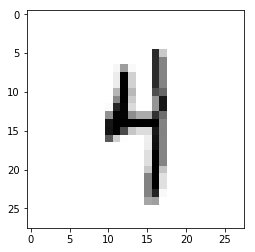

In [116]:
r = random.randint(0, mnist.test.num_examples -1)
print("Label:",sess.run(tf.argmax(mnist.test.labels[r:r+1],1)))
print("Prediction:",sess.run(tf.argmax(hypothesis,1),feed_dict={X: mnist.test.images[r:r+1]}))

plt.imshow(mnist.test.images[r:r+1].reshape(28,28), cmap='Greys',interpolation='nearest')
plt.show()